In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import asarray
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [2]:
data = pd.read_csv('online_sex_work.csv')

/Users/mak/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Предобработка данных

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   User_ID                              28831 non-null  float64
 1   Gender                               28827 non-null  object 
 2   Age                                  28831 non-null  object 
 3   Location                             28830 non-null  object 
 4   Verification                         28831 non-null  object 
 5   Sexual_orientation                   28830 non-null  object 
 6   Sexual_polarity                      28830 non-null  object 
 7   Looking_for                          28406 non-null  object 
 8   Points_Rank                          28831 non-null  object 
 9   Last_login                           28831 non-null  object 
 10  Member_since                         28831 non-null  object 
 11  Number_of_Comments_in_pu

In [4]:
data.head()

,User_ID,Gender,Age,Location,Verification,Sexual_orientation,Sexual_polarity,Looking_for,Points_Rank,Last_login,Member_since,Number_of_Comments_in_public_forum,Time_spent_chating_H:M,Number_of_advertisments_posted,Number_of_offline_meetings_attended,Profile_pictures,Friends_ID_list,Risk
0,10386.0,male,"34,6",A,Non_Verified,Homosexual,Switch,Men,50,before_10_days,17.9.2012,32,0:2,0.0,0.0,0.0,18260,No_risk
1,14.0,male,"32,2",J,Non_Verified,Heterosexual,Dominant,Women,518,before_1_days,1.11.2009,710,3:45,9.0,0.0,0.0,"11778,32024,43768,23969,27318,45884,31277",No_risk
2,16721.0,male,"33,6",K,Non_Verified,Heterosexual,Dominant,Women,150,before_3_days,1.4.2013,25,2:15,1.0,1.0,45.0,"19805,21721,19802",No_risk
3,16957.0,male,34,H,Non_Verified,Heterosexual,Dominant,Women,114,before_4_days,8.4.2013,107,359:22,1.0,0.0,1.0,"40847,38183,9507,42259,5807,28118,24848,37170,...",No_risk
4,17125.0,male,"39,5",B,Non_Verified,Heterosexual,Dominant,Women,497,before_5_days,14.4.2013,600,0:21,0.0,6.0,8.0,"1320,35739,34231,19097,20197,18069,12330,43342...",No_risk


In [5]:
data = data.iloc[:28831]

In [6]:
data.shape

(28831, 18)

<div style="background-color: #E8DAEF; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Всего данных 1048575 из них известно 28831 (10%), поэтому датасет ограничиваем по этому количеству и делаем анализ на их основе.

In [7]:
data.columns

Index(['User_ID', 'Gender', 'Age', 'Location', 'Verification',
       'Sexual_orientation', 'Sexual_polarity', 'Looking_for', 'Points_Rank',
       'Last_login', 'Member_since', 'Number_of_Comments_in_public_forum',
       'Time_spent_chating_H:M', 'Number_of_advertisments_posted',
       'Number_of_offline_meetings_attended', 'Profile_pictures',
       'Friends_ID_list', 'Risk'],
      dtype='object')

In [8]:
data['Location'].unique()

array(['A', 'J', 'K', 'H', 'B', 'L', 'F', 'E', 'C', 'M', 'O', 'G', 'S',
       'N', 'D', 'Jihomoravsk_ý kraj', 'A kraj', nan, 'South Moravian'],
      dtype=object)

<div style="background-color: #E8DAEF; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Уникальные объекты колонки 'Location' не дают нам представления о географическом распределении, можно удалить колонку
    

In [9]:
data.dtypes

User_ID                                float64
Gender                                  object
Age                                     object
Location                                object
Verification                            object
Sexual_orientation                      object
Sexual_polarity                         object
Looking_for                             object
Points_Rank                             object
Last_login                              object
Member_since                            object
Number_of_Comments_in_public_forum      object
Time_spent_chating_H:M                  object
Number_of_advertisments_posted         float64
Number_of_offline_meetings_attended    float64
Profile_pictures                       float64
Friends_ID_list                         object
Risk                                    object
dtype: object

In [10]:
def for_columns_errors(row):
    for data.row in data:
        if row.isnull().sum() > 0:
            return f'{((row.isnull().sum() / len(data)) * 100).round(4)} %'
        else:
            return 'without NaN'

In [11]:
data.apply(for_columns_errors)

User_ID                                without NaN
Gender                                    0.0139 %
Age                                    without NaN
Location                                  0.0035 %
Verification                           without NaN
Sexual_orientation                        0.0035 %
Sexual_polarity                           0.0035 %
Looking_for                               1.4741 %
Points_Rank                            without NaN
Last_login                             without NaN
Member_since                           without NaN
Number_of_Comments_in_public_forum     without NaN
Time_spent_chating_H:M                 without NaN
Number_of_advertisments_posted         without NaN
Number_of_offline_meetings_attended    without NaN
Profile_pictures                       without NaN
Friends_ID_list                          88.5089 %
Risk                                   without NaN
dtype: object

<div style="background-color: #E8DAEF; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
По выбранному датасету попробуем предсказать риск вовлечения в секс-бизнес онлайн с помощью сайта знакомств для взрослых. В первую очередь очистим датасет от ошибок и удалим колонки, которые значительно не повлияют на анализ риска. 

Наполнение колонок 'Age', 'Number_of_offline_meetings_attended', 'Number_of_advertisments_posted', 'Time_spent_chating_H:M', 'Member_since', 'Number_of_Comments_in_public_forum', 'Points_Rank' 
не соответствуют типу данных.
Категориальные данные этого датасета, выраженные в object, подвергнутся кодировке.
    
Колонки 'User_ID', 'Location', 'Friends_ID_list' можно удалить, так как эти данные не помогут в анализе риска вовления в секс-бизнес.

   

In [12]:
data.columns

Index(['User_ID', 'Gender', 'Age', 'Location', 'Verification',
       'Sexual_orientation', 'Sexual_polarity', 'Looking_for', 'Points_Rank',
       'Last_login', 'Member_since', 'Number_of_Comments_in_public_forum',
       'Time_spent_chating_H:M', 'Number_of_advertisments_posted',
       'Number_of_offline_meetings_attended', 'Profile_pictures',
       'Friends_ID_list', 'Risk'],
      dtype='object')

In [13]:
data = data.drop(columns = ['User_ID', 'Location', 
                            'Friends_ID_list' ], axis = 1)
data.columns

Index(['Gender', 'Age', 'Verification', 'Sexual_orientation',
       'Sexual_polarity', 'Looking_for', 'Points_Rank', 'Last_login',
       'Member_since', 'Number_of_Comments_in_public_forum',
       'Time_spent_chating_H:M', 'Number_of_advertisments_posted',
       'Number_of_offline_meetings_attended', 'Profile_pictures', 'Risk'],
      dtype='object')

# 'Gender'

In [14]:
data.Gender.value_counts(dropna=False)

#т.к у нас всего 4 пропуска, полагаю, что эти колонки можно удалить

male      22382
female     6445
NaN           4
Name: Gender, dtype: int64

In [15]:
data  = data.dropna(axis='index', how='any', subset=['Gender'])

In [16]:
data.shape

(28827, 15)

## Сразу произведем кодировку

In [17]:
le = LabelEncoder()
le.fit(data.Gender)
data['Gender_code'] = le.transform(data.Gender)

In [18]:
data.head()

,Gender,Age,Verification,Sexual_orientation,Sexual_polarity,Looking_for,Points_Rank,Last_login,Member_since,Number_of_Comments_in_public_forum,Time_spent_chating_H:M,Number_of_advertisments_posted,Number_of_offline_meetings_attended,Profile_pictures,Risk,Gender_code
0,male,"34,6",Non_Verified,Homosexual,Switch,Men,50,before_10_days,17.9.2012,32,0:2,0.0,0.0,0.0,No_risk,1
1,male,"32,2",Non_Verified,Heterosexual,Dominant,Women,518,before_1_days,1.11.2009,710,3:45,9.0,0.0,0.0,No_risk,1
2,male,"33,6",Non_Verified,Heterosexual,Dominant,Women,150,before_3_days,1.4.2013,25,2:15,1.0,1.0,45.0,No_risk,1
3,male,34,Non_Verified,Heterosexual,Dominant,Women,114,before_4_days,8.4.2013,107,359:22,1.0,0.0,1.0,No_risk,1
4,male,"39,5",Non_Verified,Heterosexual,Dominant,Women,497,before_5_days,14.4.2013,600,0:21,0.0,6.0,8.0,No_risk,1


In [19]:
data_for_analysis = data[['Gender', 'Gender_code']]

In [20]:
data_for_analysis = pd.DataFrame(data_for_analysis['Gender'].unique())
data_for_analysis

,0
0,male
1,female


<div style="background-color: #E8DAEF; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Создаю 'словарик' с уникальными значениями из нового датафрейма, где будут храниться старые данные и новая кодировка

In [21]:
data = data.drop(columns=['Gender'], axis=1)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28827 entries, 0 to 28830
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  28827 non-null  object 
 1   Verification                         28827 non-null  object 
 2   Sexual_orientation                   28826 non-null  object 
 3   Sexual_polarity                      28826 non-null  object 
 4   Looking_for                          28402 non-null  object 
 5   Points_Rank                          28827 non-null  object 
 6   Last_login                           28827 non-null  object 
 7   Member_since                         28827 non-null  object 
 8   Number_of_Comments_in_public_forum   28827 non-null  object 
 9   Time_spent_chating_H:M               28827 non-null  object 
 10  Number_of_advertisments_posted       28827 non-null  float64
 11  Number_of_offline_meetings_a

# 'Age'

In [23]:
data.Age.value_counts()

37,3    264
31,3    171
32,3    160
27,3    156
39,3    155
       ... 
71,1      1
86,6      1
73,5      1
87,2      1
72,2      1
Name: Age, Length: 526, dtype: int64

In [24]:
data.Age = data.Age.apply(lambda x: x.replace(',','.')) # преобразуем строки с запятой, чтобы потом можно 
                                                        # было конвертировать во float
data.Age.unique()

array(['34.6', '32.2', '33.6', '34', '39.5', '47.8', '36.7', '51', '29.5',
       '28', '42.9', '45.4', '36.1', '42', '36.8', '30.9', '33.9', '48.6',
       '56.2', '35.3', '23.8', '39.3', '47.3', '29.7', '50.8', '26.8',
       '31.3', '39.2', '35.6', '62', '28.1', '24.6', '22.1', '24.9',
       '54.3', '29.9', '24.5', '26.4', '28.6', '42.6', '20.7', '40.4',
       '35.5', '24', '52.3', '47.2', '31.4', '41', '36', '28.7', '41.7',
       '40.8', '31.8', '49.9', '35.7', '41.1', '49.6', '27.9', '27.3',
       '45', '33.8', '35.2', '42.4', '34.3', '36.3', '30', '34.5', '46.8',
       '23.3', '41.6', '20.8', '37.7', '28.3', '43.4', '41.4', '36.2',
       '28.8', '34.2', '32.4', '47.4', '56.6', '36.6', '37.3', '25.8',
       '59.2', '37.6', '48.2', '25.9', '45.7', '33.1', '57', '48.4',
       '31.1', '37.1', '39', '41.5', '38.8', '40.9', '43.9', '47.7',
       '38.3', '50', '27', '26.2', '43.2', '53.3', '44.5', '42.3', '38.9',
       '43.3', '30.3', '28.4', '26.1', '43', '36.5', '46.6', '39.

In [25]:
data[data['Age'] == '???']

,Age,Verification,Sexual_orientation,Sexual_polarity,Looking_for,Points_Rank,Last_login,Member_since,Number_of_Comments_in_public_forum,Time_spent_chating_H:M,Number_of_advertisments_posted,Number_of_offline_meetings_attended,Profile_pictures,Risk,Gender_code
1357,???,Non_Verified,Heterosexual,Dominant,Nobody,0,before_1434_days,6.11.2012,0,0:0,0.0,0.0,0.0,unknown_risk,0
4796,???,Non_Verified,Heterosexual,Dominant,Nobody,0,before_1475_days,15.4.2013,0,0:10,0.0,0.0,0.0,unknown_risk,1
5978,???,Non_Verified,Heterosexual,Dominant,Nobody,0,before_1379_days,14.6.2013,0,0:0,0.0,0.0,0.0,unknown_risk,1
8182,???,Non_Verified,Heterosexual,Switch,Women,0,before_1287_days,20.10.2013,0,0:0,0.0,0.0,0.0,unknown_risk,1
26887,???,Non_Verified,Heterosexual,Submisive,Women,35,before_1416_days,7.7.2012,22,0:42,0.0,0.0,0.0,unknown_risk,1
27252,???,Non_Verified,Homosexual,Submisive,Women,21,before_1124_days,23.3.2010,6,0:1,0.0,0.0,0.0,unknown_risk,1


In [26]:
data.Age = data.Age.replace('???', np.NaN) # так как таких значений 5, я трансформирую их в пропуски, а по 
                                           # распределению гистограмы попробую их заменить       
data.Age = data.Age.astype('float')

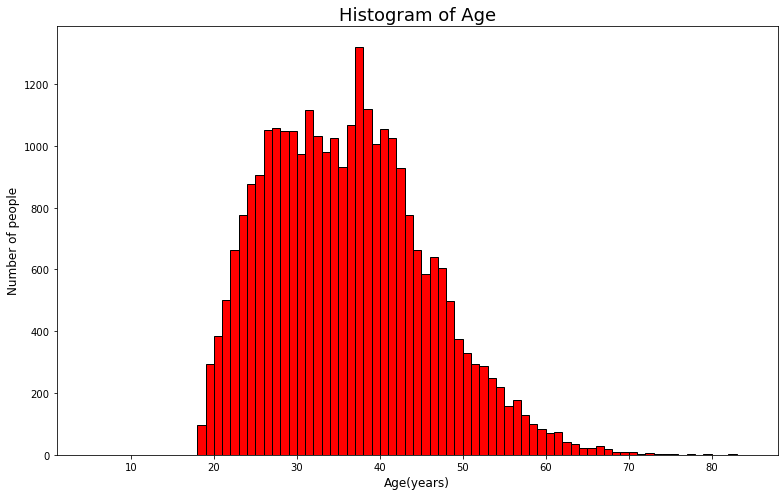

In [27]:
plt.figure(figsize = (11, 7))
plt.hist(data['Age'], 
         bins = [i+5 for i in range(80)],   
         color = 'red', 
         edgecolor = 'black')
plt.xlabel('Age(years)', size=12)
plt.ylabel('Number of people', size=12)
plt.title('Histogram of Age', size=18)
plt.tight_layout()
plt.show()

<div style="background-color: #E8DAEF; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Трансформированные пропуски, судя по гистограмме, мы можем заменить средним, потому что основная плотность сконцентрирована примерно одинаково в пределах от 17 до 43 (с резким выбросам на уровне 47 лет), наше среднее 36 лет никак не спровоцирует других выбросов

In [28]:
data.Age.mean()

36.052538079872996

In [29]:
data.Age.head(10)

0    34.6
1    32.2
2    33.6
3    34.0
4    39.5
5    47.8
6    36.7
7    51.0
8    29.5
9    28.0
Name: Age, dtype: float64

In [30]:
data.Age.fillna(data.Age.mean(), inplace=True)
data.Age = data.Age.round()
data.Age = data.Age.astype(int)

In [31]:
data.Age.head(10)

0    35
1    32
2    34
3    34
4    40
5    48
6    37
7    51
8    30
9    28
Name: Age, dtype: int64

# 'Verification'

In [32]:
data.Verification.value_counts(dropna=False)

Non_Verified     28224
Verified           602
Administrator        1
Name: Verification, dtype: int64

In [33]:
data[data['Verification'] == 'Administrator']

# так как такая колонка 1(шт), думаю, есть смысл ее удалить

,Age,Verification,Sexual_orientation,Sexual_polarity,Looking_for,Points_Rank,Last_login,Member_since,Number_of_Comments_in_public_forum,Time_spent_chating_H:M,Number_of_advertisments_posted,Number_of_offline_meetings_attended,Profile_pictures,Risk,Gender_code
89,32,Administrator,NaN,NaN,Nobody,664,before_1_days,10.5.2009,1 275,271:14,0.0,0.0,0.0,High_risk,1


In [34]:
data.drop(index = 89, inplace = True)
data.Verification.unique()

array(['Non_Verified', 'Verified'], dtype=object)

## Произведем кодировку

In [35]:
le = LabelEncoder()
le.fit(data.Verification)
data['Verification_code'] = le.transform(data.Verification)

In [36]:
dfa = data[['Verification', 'Verification_code']]
dfa_verification = pd.DataFrame(dfa['Verification'].unique())
dfa_verification.head()

,0
0,Non_Verified
1,Verified


In [37]:
data = data.drop(columns=['Verification'], axis=1)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28826 entries, 0 to 28830
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  28826 non-null  int64  
 1   Sexual_orientation                   28826 non-null  object 
 2   Sexual_polarity                      28826 non-null  object 
 3   Looking_for                          28401 non-null  object 
 4   Points_Rank                          28826 non-null  object 
 5   Last_login                           28826 non-null  object 
 6   Member_since                         28826 non-null  object 
 7   Number_of_Comments_in_public_forum   28826 non-null  object 
 8   Time_spent_chating_H:M               28826 non-null  object 
 9   Number_of_advertisments_posted       28826 non-null  float64
 10  Number_of_offline_meetings_attended  28826 non-null  float64
 11  Profile_pictures            

# 'Sexual_orientation'

In [39]:
data['Sexual_orientation'].value_counts(dropna=False)

Heterosexual    20440
bisexual         4390
bicurious        2990
Homosexual       1006
Name: Sexual_orientation, dtype: int64

In [40]:
# хочу привести колонки к одному виду, чтобы лучше выглядело

data.Sexual_orientation = data.Sexual_orientation.str.lower()
data['Sexual_orientation'].value_counts(dropna=False)

heterosexual    20440
bisexual         4390
bicurious        2990
homosexual       1006
Name: Sexual_orientation, dtype: int64

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28826 entries, 0 to 28830
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  28826 non-null  int64  
 1   Sexual_orientation                   28826 non-null  object 
 2   Sexual_polarity                      28826 non-null  object 
 3   Looking_for                          28401 non-null  object 
 4   Points_Rank                          28826 non-null  object 
 5   Last_login                           28826 non-null  object 
 6   Member_since                         28826 non-null  object 
 7   Number_of_Comments_in_public_forum   28826 non-null  object 
 8   Time_spent_chating_H:M               28826 non-null  object 
 9   Number_of_advertisments_posted       28826 non-null  float64
 10  Number_of_offline_meetings_attended  28826 non-null  float64
 11  Profile_pictures            

# 'Looking_for'

In [42]:
data['Looking_for'].value_counts(dropna=False)

Nobody              19923
Women                4896
Nobody_but_maybe     1512
Men_and_Women        1074
Men                   996
NaN                   425
Name: Looking_for, dtype: int64

<div style="background-color: #E8DAEF; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Здесь нужно сократить и поменять данные в зависимости от сексуальной ориентации. Ответы 'Никого' и 'Никого, но может быть' я бы распределила между поиском мужчины, женщины или м и ж, также ориентируясь на сексуальные предпочтения и гендер. Напишем функцию, помня, что 1 - это male, 0 - female

In [43]:
def edit_looking_for(row):
    if row['Sexual_orientation'] == 'homosexual':
        if row['Gender_code'] == 0:
            row['Looking_for'] = 'Women'
        if row['Gender_code'] == 1:
            row['Looking_for'] = 'Men'
    if row['Sexual_orientation'] == 'heterosexual':
        if row['Gender_code'] == 0:
            row['Looking_for'] = 'Men'
        if row['Gender_code'] == 1:
            row['Looking_for'] = 'Women'
    if row['Sexual_orientation'] == 'bicurious' or row['Sexual_orientation'] == 'bisexual':
        row['Looking_for'] = 'Men_and_Women'
    return row

In [44]:
data = data.apply(edit_looking_for, axis = 1)
data['Looking_for'].value_counts(dropna=False)

Women            16940
Men_and_Women     7380
Men               4506
Name: Looking_for, dtype: int64

# Кодировка

In [45]:
le = LabelEncoder()
le.fit(data.Looking_for)
data['Looking_for_code'] = le.transform(data.Looking_for)

In [46]:
dfa = data[['Looking_for', 'Looking_for_code']]
dfa_looking = pd.DataFrame(dfa['Looking_for'].unique())
dfa_looking.head()

,0
0,Men
1,Women
2,Men_and_Women


In [47]:
data = data.drop(columns=['Looking_for'], axis=1)

In [48]:
data.head()

,Age,Sexual_orientation,Sexual_polarity,Points_Rank,Last_login,Member_since,Number_of_Comments_in_public_forum,Time_spent_chating_H:M,Number_of_advertisments_posted,Number_of_offline_meetings_attended,Profile_pictures,Risk,Gender_code,Verification_code,Looking_for_code
0,35,homosexual,Switch,50,before_10_days,17.9.2012,32,0:2,0.0,0.0,0.0,No_risk,1,0,0
1,32,heterosexual,Dominant,518,before_1_days,1.11.2009,710,3:45,9.0,0.0,0.0,No_risk,1,0,2
2,34,heterosexual,Dominant,150,before_3_days,1.4.2013,25,2:15,1.0,1.0,45.0,No_risk,1,0,2
3,34,heterosexual,Dominant,114,before_4_days,8.4.2013,107,359:22,1.0,0.0,1.0,No_risk,1,0,2
4,40,heterosexual,Dominant,497,before_5_days,14.4.2013,600,0:21,0.0,6.0,8.0,No_risk,1,0,2


# 'Sexual_orientation'

In [49]:
le = LabelEncoder()
le.fit(data.Sexual_orientation)
data['Sexual_orientation_code'] = le.transform(data.Sexual_orientation)
dfa = data[['Sexual_orientation', 'Sexual_orientation_code']]
dfa_orientation = pd.DataFrame(data['Sexual_orientation'].unique())
dfa_orientation.head()

,0
0,homosexual
1,heterosexual
2,bicurious
3,bisexual


In [50]:
data = data.drop(columns=['Sexual_orientation'], axis=1)

# 'Sexual_polarity'

In [51]:
data['Sexual_polarity'].value_counts(dropna = False)

Submisive    10878
Dominant     10472
Switch        7476
Name: Sexual_polarity, dtype: int64

## Займемся кодировкой

In [52]:
le = LabelEncoder()
le.fit(data.Sexual_polarity	)
data['Sexual_polarity_code'] = le.transform(data.Sexual_polarity)

In [53]:
dfa = data[['Sexual_polarity', 'Sexual_polarity_code']]
dfa_polarity = pd.DataFrame(dfa['Sexual_polarity'].unique())
dfa_polarity.head()

,0
0,Switch
1,Dominant
2,Submisive


In [54]:
data = data.drop(columns=['Sexual_polarity'], axis=1)

In [55]:
data.head()

,Age,Points_Rank,Last_login,Member_since,Number_of_Comments_in_public_forum,Time_spent_chating_H:M,Number_of_advertisments_posted,Number_of_offline_meetings_attended,Profile_pictures,Risk,Gender_code,Verification_code,Looking_for_code,Sexual_orientation_code,Sexual_polarity_code
0,35,50,before_10_days,17.9.2012,32,0:2,0.0,0.0,0.0,No_risk,1,0,0,3,2
1,32,518,before_1_days,1.11.2009,710,3:45,9.0,0.0,0.0,No_risk,1,0,2,2,0
2,34,150,before_3_days,1.4.2013,25,2:15,1.0,1.0,45.0,No_risk,1,0,2,2,0
3,34,114,before_4_days,8.4.2013,107,359:22,1.0,0.0,1.0,No_risk,1,0,2,2,0
4,40,497,before_5_days,14.4.2013,600,0:21,0.0,6.0,8.0,No_risk,1,0,2,2,0


# 'Points_Rank'

In [56]:
data['Points_Rank'].unique()

array(['50', '518', '150', '114', '497', '127', '18', '38', '-26', '15',
       '36', '30', '313', '0', '155', '236', '60', '29', '564', '296',
       '66', '404', '20', '195', '56', '226', '90', '78', '32', '58',
       '83', '124', '10', '93', '19', '3', '51', '451', '268', '429', '5',
       '25', '12', '28', '512', '184', '307', '471', '48', '55', '318',
       '68', '62', '52', '1 626', '43', 'a', '73', '115', '21', '81',
       '34', '64', '100', '85', '165', '17', '61', '191', '40', '2', '1',
       '16', '65', '39', '-100', '641', '-50', '86', '8', '97', '80',
       '-20', '27', '291', '153', '166', '72', '-10', '131', '-70', '145',
       '35', '4', '9', '257', '228', '49', '130', '125', '-5', '156',
       '106', '11', '24', '112', '175', '119', '37', '26', '45', '120',
       '75', '31', '42', '82', '14', '69', '-15', '104', '54', '-45',
       '95', '-25', '41', '70', '53', '126', '105', '92', '13', '284',
       '23', '22', '455', '-30', '-35', '7', '163', '529', '180', '

In [57]:
data.Points_Rank.replace(' ','',inplace = True, regex =True)

# заменяем пропуски между числами

In [58]:
data[data['Points_Rank'] == 'a'].shape

(209, 15)

<div style="background-color: #E8DAEF; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Так как ошибок с 'а' всего около 0.7%, и попала всего одна буква, то, думаю, можно заменить на 0

In [59]:
data.Points_Rank.replace('a','0',inplace = True)
data.Points_Rank = data.Points_Rank.astype(int)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28826 entries, 0 to 28830
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  28826 non-null  int64  
 1   Points_Rank                          28826 non-null  int64  
 2   Last_login                           28826 non-null  object 
 3   Member_since                         28826 non-null  object 
 4   Number_of_Comments_in_public_forum   28826 non-null  object 
 5   Time_spent_chating_H:M               28826 non-null  object 
 6   Number_of_advertisments_posted       28826 non-null  float64
 7   Number_of_offline_meetings_attended  28826 non-null  float64
 8   Profile_pictures                     28826 non-null  float64
 9   Risk                                 28826 non-null  object 
 10  Gender_code                          28826 non-null  int64  
 11  Verification_code           

# 'Last_login'

In [61]:
data['Last_login'].value_counts(dropna = False)

before_1_days       1391
before_3_days        961
before_4_days        314
before_6_days        237
before_5_days        233
                    ... 
before_2002_days       1
before_1905_days       1
before_2155_days       1
before_2359_days       1
before_2151_days       1
Name: Last_login, Length: 2360, dtype: int64

<div style="background-color: #E8DAEF; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Оставляем только строки с числами внутри, убирая before и days из списка, который мы создали, разделив методом split

In [62]:
data['Last_login'] = [x.split('_').pop(1) for x in data.Last_login]

In [63]:
data['Last_login'] = data['Last_login'].astype('int')
data.rename(columns={'Last_login': 'Last_login(days_before)'}, inplace=True)

In [64]:
data.head()

,Age,Points_Rank,Last_login(days_before),Member_since,Number_of_Comments_in_public_forum,Time_spent_chating_H:M,Number_of_advertisments_posted,Number_of_offline_meetings_attended,Profile_pictures,Risk,Gender_code,Verification_code,Looking_for_code,Sexual_orientation_code,Sexual_polarity_code
0,35,50,10,17.9.2012,32,0:2,0.0,0.0,0.0,No_risk,1,0,0,3,2
1,32,518,1,1.11.2009,710,3:45,9.0,0.0,0.0,No_risk,1,0,2,2,0
2,34,150,3,1.4.2013,25,2:15,1.0,1.0,45.0,No_risk,1,0,2,2,0
3,34,114,4,8.4.2013,107,359:22,1.0,0.0,1.0,No_risk,1,0,2,2,0
4,40,497,5,14.4.2013,600,0:21,0.0,6.0,8.0,No_risk,1,0,2,2,0


# 'Member_since'

<div style="background-color: #E8DAEF; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Здесь нужно установить формат datetime и вынести только год отдельной колонкой, предварительно очистив данные

In [65]:
data['Member_since'].value_counts(dropna = False)

1.7.2012     110
9.1.2013      97
2.7.2012      89
3.7.2012      76
4.7.2012      63
            ... 
18.2.2010      1
19.2.2010      1
7.12.2009      1
21.2.2010      1
20.5.2010      1
Name: Member_since, Length: 2628, dtype: int64

In [66]:
data.Member_since.min(), data.Member_since.max() # таким образом нашла странные значения

('0,278159722', 'dnes')

In [67]:
data.Member_since = data.Member_since.replace('dnes',np.nan)
data.Member_since = data.Member_since.replace('0,278159722',np.nan)

In [68]:
data.Member_since = pd.to_datetime(data.Member_since, format = '%d.%m.%Y')
data['Member_since'].mean()  

Timestamp('2014-03-02 06:09:55.210661376')

In [69]:
data.loc[(data['Member_since'].isnull()), 'Member_since'] = data['Member_since'].mean()  

# так как пропусков немного, можно заменить на среднюю дату

data['Member_since(year)'] = data['Member_since'].dt.year

data = data.drop(columns=['Member_since'], axis=1)

data.head()

,Age,Points_Rank,Last_login(days_before),Number_of_Comments_in_public_forum,Time_spent_chating_H:M,Number_of_advertisments_posted,Number_of_offline_meetings_attended,Profile_pictures,Risk,Gender_code,Verification_code,Looking_for_code,Sexual_orientation_code,Sexual_polarity_code,Member_since(year)
0,35,50,10,32,0:2,0.0,0.0,0.0,No_risk,1,0,0,3,2,2012
1,32,518,1,710,3:45,9.0,0.0,0.0,No_risk,1,0,2,2,0,2009
2,34,150,3,25,2:15,1.0,1.0,45.0,No_risk,1,0,2,2,0,2013
3,34,114,4,107,359:22,1.0,0.0,1.0,No_risk,1,0,2,2,0,2013
4,40,497,5,600,0:21,0.0,6.0,8.0,No_risk,1,0,2,2,0,2013


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28826 entries, 0 to 28830
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  28826 non-null  int64  
 1   Points_Rank                          28826 non-null  int64  
 2   Last_login(days_before)              28826 non-null  int64  
 3   Number_of_Comments_in_public_forum   28826 non-null  object 
 4   Time_spent_chating_H:M               28826 non-null  object 
 5   Number_of_advertisments_posted       28826 non-null  float64
 6   Number_of_offline_meetings_attended  28826 non-null  float64
 7   Profile_pictures                     28826 non-null  float64
 8   Risk                                 28826 non-null  object 
 9   Gender_code                          28826 non-null  int64  
 10  Verification_code                    28826 non-null  int64  
 11  Looking_for_code            

# 'Number_of_Comments_in_public_forum'

In [71]:
data.Number_of_Comments_in_public_forum.unique()

array(['32', '710', '25', '107', '600', '159', '1', '91', '278', '4', '0',
       '47', '51', '59', '501', '68', '3', '247', '845', '355', '166',
       '332', '42', '168', '43', '73', '2', '62', '36', '66', '57', '17',
       '8', '120', '78', '7', '34', '96', '771', '92', '267', '41', '13',
       '644', '222', '187', '294', '38', '5', '9', '30', '209', '11',
       '1 894', '14', '10', '6', '29', '26', '74', '100', '886', '144',
       '16', '12', '169', '69', '90', '18', '362', '126', '22', '54',
       '70', '37', '55', '72', '31', '20', '19', '44', '229', '24', '83',
       '21', '125', '350', '23', '170', '65', '574', '218', '15', '27',
       '56', '39', '89', '199', '58', '80', '174', '134', '1 174', '188',
       '133', '28', '45', '116', '46', '118', '64', '486', '154', '145',
       '164', '35', '52', '50', '122', '618', '81', '420', '309', '84',
       '63', '153', '123', '48', '481', '76', '147', '85', '112', '226',
       '589', '82', '77', '268', '61', '40', '60', '146'

In [72]:
data.Number_of_Comments_in_public_forum.replace(' ','',inplace = True, regex =True) # исправляю пропуски
data.Number_of_Comments_in_public_forum = data.Number_of_Comments_in_public_forum.astype(int)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28826 entries, 0 to 28830
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  28826 non-null  int64  
 1   Points_Rank                          28826 non-null  int64  
 2   Last_login(days_before)              28826 non-null  int64  
 3   Number_of_Comments_in_public_forum   28826 non-null  int64  
 4   Time_spent_chating_H:M               28826 non-null  object 
 5   Number_of_advertisments_posted       28826 non-null  float64
 6   Number_of_offline_meetings_attended  28826 non-null  float64
 7   Profile_pictures                     28826 non-null  float64
 8   Risk                                 28826 non-null  object 
 9   Gender_code                          28826 non-null  int64  
 10  Verification_code                    28826 non-null  int64  
 11  Looking_for_code            

# 'Number_of_advertisments_posted'

In [74]:
data.Number_of_advertisments_posted.unique()

array([ 0.,  9.,  1., 17.,  2.,  3.,  5.,  6.,  4., 10.,  7., 14., 16.,
       15.,  8., 18., 21., 11.])

In [75]:
data.Number_of_advertisments_posted = data.Number_of_advertisments_posted.astype(int)

# изменяю на целые, так как float у нас нет

#  'Number_of_offline_meetings_attended'

In [76]:
data.Number_of_offline_meetings_attended.unique()

array([ 0.,  1.,  6.,  9.,  3., 11.,  5.,  4.,  2., 10., 13.,  7.,  8.,
       16., 23., 15.])

In [77]:
data.Number_of_offline_meetings_attended = data.Number_of_offline_meetings_attended.astype(int)

# изменяю на целые, так как float у нас нет

# 'Profile_pictures'

In [78]:
data.Profile_pictures.unique()

array([  0.,  45.,   1.,   8.,   2.,   4.,  25.,   5.,  11.,   3.,  10.,
         6.,   7.,  16.,  33.,  19.,  48.,  36.,  30.,  15.,  14.,   9.,
        12.,  18.,  27.,  17., 117.,  31.,  21.,  13.,  34.,  32.,  53.,
        54.,  67.,  65.,  92.,  26.,  37.,  46., 136.,  59.,  41.,  23.,
        90.,  22.,  50.,  24.,  20.,  35.,  29.,  79.,  47.,  28.,  42.,
        81.,  49.,  93., 147.,  77.,  58.,  78.,  40.])

In [79]:
data.Profile_pictures = data.Profile_pictures.astype(int)

# изменяю на целые, так как float у нас нет

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28826 entries, 0 to 28830
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Age                                  28826 non-null  int64 
 1   Points_Rank                          28826 non-null  int64 
 2   Last_login(days_before)              28826 non-null  int64 
 3   Number_of_Comments_in_public_forum   28826 non-null  int64 
 4   Time_spent_chating_H:M               28826 non-null  object
 5   Number_of_advertisments_posted       28826 non-null  int64 
 6   Number_of_offline_meetings_attended  28826 non-null  int64 
 7   Profile_pictures                     28826 non-null  int64 
 8   Risk                                 28826 non-null  object
 9   Gender_code                          28826 non-null  int64 
 10  Verification_code                    28826 non-null  int64 
 11  Looking_for_code                     2882

# 'Time_spent_chating_H:M'

In [81]:
data['Time_spent_chating_H:M'].value_counts()

0:0      22820
0:1        593
0:2        298
0:3        239
0:4        175
         ...  
18:0         1
38:22        1
856:4        1
42:19        1
5:58         1
Name: Time_spent_chating_H:M, Length: 1198, dtype: int64

<div style="background-color: #E8DAEF; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Здесь нужно часы перевести в минуты и оставить столбец в минутах

In [82]:
data['Time_spent_chating_H:M'].replace(' ','', inplace = True, regex = True)

# Когда делала функцию ниже, возникла ошибка ValueError: invalid literal for int() with base 10: '1 436', исправляю

In [83]:
def to_minutes(row):
    hrs_min = row.split(':')
    hrs = int(hrs_min[0])
    mins = int(hrs_min[1])
    return hrs*60 + mins

In [84]:
data['Time_spent_chating_H:M'] = data['Time_spent_chating_H:M'].apply(to_minutes)
data['Time_spent_chating_H:M'].head(10)
data.rename(columns={'Time_spent_chating_H:M': 'Time_spent_chat(min)'}, inplace=True)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28826 entries, 0 to 28830
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Age                                  28826 non-null  int64 
 1   Points_Rank                          28826 non-null  int64 
 2   Last_login(days_before)              28826 non-null  int64 
 3   Number_of_Comments_in_public_forum   28826 non-null  int64 
 4   Time_spent_chat(min)                 28826 non-null  int64 
 5   Number_of_advertisments_posted       28826 non-null  int64 
 6   Number_of_offline_meetings_attended  28826 non-null  int64 
 7   Profile_pictures                     28826 non-null  int64 
 8   Risk                                 28826 non-null  object
 9   Gender_code                          28826 non-null  int64 
 10  Verification_code                    28826 non-null  int64 
 11  Looking_for_code                     2882

# 'Risk'

In [86]:
data.Risk.value_counts(dropna=False)

unknown_risk    28737
No_risk            57
High_risk          32
Name: Risk, dtype: int64

<div style="background-color: #E8DAEF; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Представленные данные в Risk мало о чем говорят, нужно проанализировать высокий риск и отсутствие риска, найти общее и попробовать что-то поменять о неизвестном риске

In [87]:
display(data_for_analysis.head())
display(dfa_verification.head())
display(dfa_orientation.head())
display(dfa_looking.head())
display(dfa_polarity.head())

,0
0,male
1,female


,0
0,Non_Verified
1,Verified


,0
0,homosexual
1,heterosexual
2,bicurious
3,bisexual


,0
0,Men
1,Women
2,Men_and_Women


,0
0,Switch
1,Dominant
2,Submisive


In [88]:
data[data['Risk'] == 'No_risk']

,Age,Points_Rank,Last_login(days_before),Number_of_Comments_in_public_forum,Time_spent_chat(min),Number_of_advertisments_posted,Number_of_offline_meetings_attended,Profile_pictures,Risk,Gender_code,Verification_code,Looking_for_code,Sexual_orientation_code,Sexual_polarity_code,Member_since(year)
0,35,50,10,32,2,0,0,0,No_risk,1,0,0,3,2,2012
1,32,518,1,710,225,9,0,0,No_risk,1,0,2,2,0,2009
2,34,150,3,25,135,1,1,45,No_risk,1,0,2,2,0,2013
3,34,114,4,107,21562,1,0,1,No_risk,1,0,2,2,0,2013
4,40,497,5,600,21,0,6,8,No_risk,1,0,2,2,0,2013
5,48,127,1,159,86212,1,9,0,No_risk,0,0,0,2,0,2013
6,37,18,1,1,7340,17,0,0,No_risk,1,0,1,0,1,2010
7,51,38,9,91,5,0,0,2,No_risk,1,0,2,2,0,2010
8,30,150,4,278,5059,0,3,4,No_risk,0,0,1,0,1,2013
9,28,-26,1,4,203,0,0,0,No_risk,1,0,2,2,2,2013


<div style="background-color: #E8DAEF; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
При анализе данных "No_risk" заметна тенденция, что наименьший риск на сайте в основном для бисексуальных женщин возрастом от 30 до 50, которые чаще всего находятся в поиске женщин/мужчин с рейтингом на сайте не выше 600.
Попробуем по этим условиям заменить некоторые значения из данных unknown_risk

In [89]:
data.loc[(data['Risk'] == 'unknown_risk') & (data['Gender_code'] == 1)
         & (data['Sexual_orientation_code'] == 2)
         & (data['Age'] >= 30)
         & (data['Age'] <= 50)
         & (data['Looking_for_code'] == 2)
         & (data['Points_Rank'] <= 600),
         'Risk'] = 'No_risk'

In [90]:
data.Risk.value_counts(dropna=False)

unknown_risk    17223
No_risk         11571
High_risk          32
Name: Risk, dtype: int64

In [91]:
data[data['Risk'] == 'High_risk'].head(56)

,Age,Points_Rank,Last_login(days_before),Number_of_Comments_in_public_forum,Time_spent_chat(min),Number_of_advertisments_posted,Number_of_offline_meetings_attended,Profile_pictures,Risk,Gender_code,Verification_code,Looking_for_code,Sexual_orientation_code,Sexual_polarity_code,Member_since(year)
57,36,0,4,0,0,0,0,0,High_risk,1,0,2,2,1,2012
58,41,0,1,1,18,1,0,0,High_risk,1,0,2,2,1,2012
59,50,15,11,0,0,0,0,0,High_risk,1,0,2,2,1,2010
60,28,5,6,0,350,0,0,0,High_risk,1,0,1,0,1,2013
61,52,0,424,0,0,0,0,0,High_risk,1,0,2,2,1,2013
62,27,15,1,0,59,1,0,0,High_risk,1,0,2,2,1,2013
63,45,25,11,41,0,0,0,0,High_risk,0,0,0,2,0,2013
64,34,12,1306,1,2508,0,0,0,High_risk,0,0,1,0,2,2013
65,35,0,1255,0,0,0,0,0,High_risk,1,0,2,2,1,2013
66,27,28,4,13,0,1,0,0,High_risk,1,0,1,0,1,2013


In [92]:
data[data['Risk'] == 'High_risk'].Points_Rank.mean()

131.9375

<div style="background-color: #E8DAEF; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
При анализе данных "High_risk" заметна тенденция, что наивысший риск на сайте для женщин возрастом от 21 до 35 с сексуальной полярностью Dominant, которые чаще всего в поиске женщин/мужчин

In [93]:
data.loc[(data['Risk'] == 'unknown_risk') & (data['Gender_code'] == 1)
         & (data['Sexual_polarity_code'] == 1)
         & (data['Age'] >= 21)
         & (data['Age'] <= 35)
         & (data['Looking_for_code'] == 2)
         & (data['Points_Rank'] <= 350),
         'Risk'] = 'High_risk'

In [94]:
data.Risk = data.Risk.apply(lambda x: x.replace('unknown_risk','Medium_risk'))
data.Risk.value_counts(dropna=False)

Medium_risk    16161
No_risk        11571
High_risk       1094
Name: Risk, dtype: int64

## Кодирование Target

In [95]:
le = LabelEncoder()
le.fit(data.Risk)
data['Risk_code'] = le.transform(data.Risk)

In [96]:
dfa = data[['Risk', 'Risk_code']]
dfa_risk = pd.DataFrame(data['Risk'].unique())
dfa_orientation.head()

,0
0,homosexual
1,heterosexual
2,bicurious
3,bisexual


In [97]:
data = data.drop(columns=['Risk'], axis=1)

# DecisionTreeClassifier

## Объявление вектора признаков и целевой переменной

In [98]:
Features = data.drop(columns='Risk_code')

In [99]:
Target = data['Risk_code']

## Разделение данных на training и test

In [100]:
features_train, features_, target_train, target_ = train_test_split(Features, 
                                                                    Target,
                                                                    train_size=0.60, 
                                                                    random_state=20)

In [101]:
features_train.shape

(17295, 14)

In [102]:
features_valid, features_test, target_valid, target_test = train_test_split(features_, 
                                                                            target_,
                                                                            test_size=0.5,
                                                                            random_state=20)

In [103]:
features_test.shape

(5766, 14)

In [104]:
dtc_model = DecisionTreeClassifier(random_state=20)

In [105]:
dtc_model.fit(features_train, target_train)

DecisionTreeClassifier(random_state=20)

In [106]:
predicted = dtc_model.predict(features_valid)

In [107]:
accuracy_score(target_valid, predicted)

0.99479618386817

## Важность признаков

<div style="background-color: #E8DAEF; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Мы можем использовать относительные значения, чтобы понять, какие признаки более релевантны и уменьшить 
вероятность ошибки из-за включения признака. Потом удалим лишние признаки

In [108]:
importances = dtc_model.feature_importances_
feature_list = list(features_train.columns)
feature_results = pd.DataFrame({'feature': feature_list,'importance': importances})
feature_results = feature_results.sort_values('importance',ascending = False).reset_index(drop=True)
feature_results.head(17)

,feature,importance
0,Looking_for_code,0.477670
1,Age,0.414437
2,Sexual_polarity_code,0.089202
3,Gender_code,0.007441
4,Sexual_orientation_code,0.004517
5,Number_of_Comments_in_public_forum,0.001707
6,Time_spent_chat(min),0.001551
7,Last_login(days_before),0.001413
8,Points_Rank,0.001061
9,Number_of_offline_meetings_attended,0.000385


<div style="background-color: #E8DAEF; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Я убрала 6 признаков менее релевантных, снова создаю тренировочные, валидационные и тест данные уже без убранных признаков

In [135]:
Features = data.drop(columns=['Risk_code', 'Profile_pictures', 'Verification_code',
                              'Number_of_advertisments_posted', 'Number_of_offline_meetings_attended',
                              'Member_since(year)'])

In [136]:
Target = data['Risk_code']

## Разделение данных на training и test

In [137]:
features_train, features_, target_train, target_ = train_test_split(Features, 
                                                                    Target,
                                                                    train_size=0.60, 
                                                                    random_state=20)

In [138]:
features_valid, features_test, target_valid, target_test = train_test_split(features_, 
                                                                            target_,
                                                                            test_size=0.5,
                                                                            random_state=20)

In [139]:
dtc_model = DecisionTreeClassifier(random_state=20)

In [140]:
dtc_model.fit(features_train, target_train)

DecisionTreeClassifier(random_state=20)

In [141]:
predictions = dtc_model.predict(features_valid)

In [142]:
print('accuracy_score:', accuracy_score(predictions, target_valid))

accuracy_score: 0.9934084995663487


In [117]:
dtc_model.get_depth()

18

## Настраиваем гиперпараметры

In [119]:
best_model = None
best_depth = None
best_accuracy = None

for max_depth in range(1, 20):
    model = DecisionTreeClassifier(random_state=20, max_depth=max_depth, 
                                   splitter='best', min_samples_split=2,
                                   min_samples_leaf=1)
    model.fit(features_train, target_train)
    pred = model.predict(features_valid)
    acc = accuracy_score(target_valid, pred)
    print(f'depth: {max_depth},\naccuracy_score: {acc}')
    if best_accuracy is None:
        best_accuracy = acc
    if best_accuracy < acc:
        best_accuracy = acc
        best_depth = max_depth
        best_model = model

depth: 1,
accuracy_score: 0.8097137901127494
depth: 2,
accuracy_score: 0.9118820468343452
depth: 3,
accuracy_score: 0.9597571552471813
depth: 4,
accuracy_score: 0.9918473547267996
depth: 5,
accuracy_score: 0.9953165654813529
depth: 6,
accuracy_score: 0.9961838681699914
depth: 7,
accuracy_score: 0.9953165654813529
depth: 8,
accuracy_score: 0.99479618386817
depth: 9,
accuracy_score: 0.9946227233304423
depth: 10,
accuracy_score: 0.994275802254987
depth: 11,
accuracy_score: 0.9939288811795317
depth: 12,
accuracy_score: 0.9941023417172593
depth: 13,
accuracy_score: 0.9939288811795317
depth: 14,
accuracy_score: 0.9941023417172593
depth: 15,
accuracy_score: 0.9939288811795317
depth: 16,
accuracy_score: 0.9941023417172593
depth: 17,
accuracy_score: 0.9939288811795317
depth: 18,
accuracy_score: 0.9934084995663487
depth: 19,
accuracy_score: 0.9934084995663487


In [120]:
print(f'depth: {best_depth},\naccuracy_score: {best_accuracy}')

depth: 6,
accuracy_score: 0.9961838681699914


In [121]:
dtc_model = DecisionTreeClassifier(random_state=20, max_depth=6, 
                                   splitter='best',
                                   min_samples_split=2,
                                   min_samples_leaf=1)

In [122]:
dtc_model.fit(features_train, target_train)

DecisionTreeClassifier(max_depth=6, random_state=20)

In [123]:
predicted = dtc_model.predict(features_test)

In [124]:
accuracy_score(target_test, predicted)

0.9977454040929588

In [125]:
print(classification_report(target_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       204
           1       1.00      1.00      1.00      3286
           2       1.00      1.00      1.00      2276

    accuracy                           1.00      5766
   macro avg       1.00      0.99      0.99      5766
weighted avg       1.00      1.00      1.00      5766



# RandomForestClassifier

<div style="background-color: #E8DAEF; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace"> 
Разделение данных на training совместно с valid и test

In [126]:
Features = data.drop(columns=['Risk_code', 'Profile_pictures', 'Verification_code',
                              'Number_of_advertisments_posted', 'Number_of_offline_meetings_attended',
                              'Member_since(year)'])

In [127]:
Target = data['Risk_code']

In [143]:
features_, features_test, target_, target_test = train_test_split(Features, 
                                                                    Target,
                                                                    train_size=0.8, 
                                                                    random_state=20)

features_train, features_valid, target_train, target_valid = train_test_split(features_, 
                                                                            target_,
                                                                            test_size=0.25,
                                                                            random_state=20)

print(f'Часть features_train: {features_train.shape[0] / data.shape[0]}')
print(f'Часть features_train: {features_valid.shape[0] / data.shape[0]}')
print(f'Часть features_train: {features_test.shape[0] / data.shape[0]}')

Часть features_train: 0.599979185457573
Часть features_train: 0.19999306181919102
Часть features_train: 0.20002775272323597


In [144]:
rfc_model = RandomForestClassifier(random_state=20)

In [145]:
rfc_model.fit(features_train, target_train)

RandomForestClassifier(random_state=20)

In [146]:
predicted = rfc_model.predict(features_valid)

In [147]:
accuracy_score(target_valid, predicted)

0.9967042497831743

In [148]:
%%time

best_depth = None
best_accuracy = None
best_estimators = None

for max_depth in range(10, 21):
    for n_estimators in range(50, 90):
        rfc_model = RandomForestClassifier(random_state=12345, 
                                       max_depth=max_depth, 
                                       n_estimators=n_estimators,
                                       min_samples_split=2,
                                       min_samples_leaf=1)
        rfc_model.fit(features_train, target_train)
        predictions = rfc_model.predict(features_valid)
        now_accuracy = accuracy_score(target_valid, predictions)
        if not best_accuracy:
            best_accuracy = now_accuracy
        if now_accuracy > best_accuracy:
            best_accuracy = now_accuracy
            best_depth = max_depth
            best_estimators = n_estimators

CPU times: user 3min 32s, sys: 1.45 s, total: 3min 33s
Wall time: 3min 36s


In [134]:
print(f'depth: {max_depth},\nn_estimators: {n_estimators}\naccuracy_score: {now_accuracy}\n')

depth: 20,
n_estimators: 89
accuracy_score: 0.9967042497831743



<div style="background-color: #E8DAEF; margin: 1%; padding: 1%; font-size: 1.15em; font-family: monospace">
Цель работы заключалась в том, чтобы сравнить две модели классификации DecisionTreeClassifier и RandomForesrClassifier
на тренировочных и тестовых данных подготовленного и очищенного от пропусков и ошибок датасета и выявить какая из этих моделей показывает более точный результат. Accuracy_score при Desicion Tree Classifier == 0.9976149176062445, при использовании модели Random Forest Classifier ==   0.9967042497831743
